# Antes de la corrección

**1. Inspección del dataset**

In [ ]:
# Importamos las librerías que vamos a utilizar

import pandas as pd
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importamos el dataset a google drive, y lo importamos desde ahí

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/CENSO POBLACIONAL AGOSTO.xlsx'

df = pd.read_excel(file_path)

df.head()

Mounted at /content/drive


,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [ ]:
# Verificamos que no hayan filas ni datos duplicados

num_dups = df.duplicated().sum()
print("Número de filas duplicadas: ", num_dups)

df_dups = df[df.duplicated(keep=False)]
print("Primeras filas duplicadas", df_dups.head)

Número de filas duplicadas:  0
Primeras filas duplicadas <bound method NDFrame.head of Empty DataFrame
Columns: [cod_dpto, Departamento, cod_mpio, Municipio, fec_paquete, num_paquete, num_ficha, ide_ficha_origen, ide_edificacion, ver_estructura, ori_encuesta, Cod_clase, Cod_centro_poblado, Cod_area_coordinacion, Cod_area_operativa, Cod_uni_cobertura, Cod_comuna, Cod_corregimiento, NOM_CORREGIMIENTO, Cod_vereda, NOM_VEREDA, Cod_barrio, NOM_BARRIO, Cod_enumerador, tot_viviendas, tot_hogares, ord_vivienda, ind_direccion, Dir_vivienda, uso_vivienda, Ide_foto, fec_ini_encuesta, fec_fin_encuesta, Coord_x_manual_rec, Coord_y_manual_rec, Coord_x_auto_rec, Coord_y_auto_rec, Gps_Alt_auto_rec, Fec_captura_gps_rec, Gps_Distancia_rec, Coord_x_manual_enc, Coord_y_manual_enc, Coord_x_auto_enc, Coord_y_auto_enc, Gps_Alt_auto_enc, Fec_captura_gps_enc, Gps_Distancia_enc, Est_nov_cartografia, Cod_digitador, Fec_digitacion, ind_formato, Num_hogares_recuento, est_ficha, Cod_equipo_encuesta, Num_visita, Cod

In [ ]:
# Hacemos un recuento de cuantos valores faltantes tenemos en el dataset

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

miss_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
})
miss_df = miss_df[miss_df['missing_count'] > 0].sort_values('missing_percent', ascending=False)

# Mostrar las 20 columnas con más valores faltantes
print(f"Columnas con valores faltantes: {miss_df.shape[0]} de {df.shape[1]}")
print(f"Top 20 columnas con valores faltantes", miss_df.head(20))

Columnas con valores faltantes: 16 de 255
Top 20 columnas con valores faltantes                        missing_count  missing_percent
Cod_Chip                       12987       100.000000
Dir_Chip                       12987       100.000000
Email_contacto                 12772        98.344498
Jefe_UG                         8476        65.265265
fec_ini_visita2                 6311        48.594749
fec_ini_persona1                6221        47.901748
fec_fin_persona1                6220        47.894048
seg_nom_informante              6176        47.555248
seg_nombre                      4849        37.337337
fec_fin_visita2                 1181         9.093709
fec_ini_visita1                  693         5.336105
fec_fin_visita1                  693         5.336105
fec_actualizacion_cns            599         4.612305
seg_ape_informante               394         3.033803
seg_apellido                     254         1.955802
ide_firma_informante             140         1.078001


In [ ]:
# Sacamos las variables irrelevantes o que no proporcionan algún peso al dataset

columns_to_drop = ['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'fec_paquete', 'Cod_Chip', 'Dir_Chip', 'pri_nom_informante', 'seg_nom_informante', 'pri_ape_informante', 'seg_ape_informante',
                   'Ide_foto', 'fec_ini_encuesta', 'fec_fin_encuesta', 'seg_nombre', 'seg_apellido', 'fec_fin_visita2', 'fec_fin_visita1', 'fec_ini_visita1', 'Dir_vivienda']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

df.head()

,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,10001,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,10001,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,10001,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,10001,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,1687,128326,6.841800e+19,0,50118082017,1,3,0,1,10001,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


**2. Limpieza del dataset**

In [ ]:
# Luego de eliminar estas variables del dataset procedemos a rellenar valores nulos

numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
datetime_cols = df.select_dtypes(include='datetime').columns

for col in numeric_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().any():
        mode = df[col].mode(dropna=True)
        df[col].fillna(mode[0] if not mode.empty else 'Desconocido', inplace=True)

for col in datetime_cols:
    if df[col].isnull().any():
        mode = df[col].mode(dropna=True)
        if not mode.empty:
            df[col].fillna(mode[0], inplace=True)

# 1. Primeras filas tras limpieza
print("Primeras filas tras limpieza", df.head())

# 2. Resumen de valores faltantes tras limpieza
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
miss_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
})
miss_df = miss_df[miss_df['missing_count'] > 0]
print("Valores faltantes tras limpieza", miss_df)

# 3. Distribución de la columna 'Clasificacion'
counts = df['Grupo'].value_counts(dropna=False).rename_axis('Grupo').reset_index(name='count')
counts['percent'] = (counts['count'] / len(df)) * 100
print("Distribución de 'Clasificacion'", counts)

Primeras filas tras limpieza    num_paquete  num_ficha  ide_ficha_origen  ide_edificacion ver_estructura  \
0         1687     128326      6.841800e+19                0    50118082017   
1         1687     128326      6.841800e+19                0    50118082017   
2         1687     128326      6.841800e+19                0    50118082017   
3         1687     128326      6.841800e+19                0    50118082017   
4         1687     128326      6.841800e+19                0    50118082017   

   ori_encuesta  Cod_clase  Cod_centro_poblado  Cod_area_coordinacion  \
0             1          3                   0                      1   
1             1          3                   0                      1   
2             1          3                   0                      1   
3             1          3                   0                      1   
4             1          3                   0                      1   

   Cod_area_operativa  ...        ide_Ug  persug  Capital

**3. Al limpiar el dataset nos damos cuenta de que existen clases A, B, C y D**

In [ ]:
def extract_classification(data):
    classification = data["Clasificacion"].str.extract('([A-Za-z]+)(\d+)', expand=True)
    classification.columns = ['Letter', 'Number']

    return classification

In [ ]:
df[["Letter", "Number"]] = extract_classification(df)

In [ ]:
# Aquí nos damos cuenta de que hay grupos con letras, pero simplemente podemos excluir los números

df[["Clasificacion", "Letter", "Number"]].head()

,Clasificacion,Letter,Number
0,A02,A,02
1,C02,C,02
2,C02,C,02
3,C02,C,02
4,C02,C,02


In [ ]:
df["Letter"].value_counts(), df["Number"].value_counts()

(Letter
 B    5127
 A    3821
 C    3444
 D     595
 Name: count, dtype: int64,
 Number
 04    2162
 02    2070
 03    2025
 05    1799
 01    1705
 06     834
 07     782
 08     194
 10     180
 21     180
 09     170
 13     144
 12     137
 11     127
 17     105
 16     102
 15      89
 14      88
 18      77
 20       9
 19       8
 Name: count, dtype: int64)

In [ ]:
def replace_classification(data):
    letter_mapping = {"A": 0, "B": 1, "C": 2, "D": 3}
    number_mapping = {
    '04': 0,
    '02': 1,
    '03': 2,
    '05': 3,
    '01': 4,
    '06': 5,
    '07': 6,
    '08': 7,
    '10': 8,
    '21': 9,
    '09': 10,
    '13': 11,
    '12': 12,
    '11': 13,
    '17': 14,
    '16': 15,
    '15': 16,
    '14': 17,
    '18': 18,
    '20': 19,
    '19': 20
    }

    data["LetterMapped"] = data["Letter"].map(letter_mapping)
    data["NumberMapped"] = data["Number"].map(number_mapping)

    return data

In [ ]:
df = replace_classification(df)

df[["Clasificacion", "Letter", "Number", "LetterMapped", "NumberMapped"]].head()

,Clasificacion,Letter,Number,LetterMapped,NumberMapped
0,A02,A,02,0,1
1,C02,C,02,2,1
2,C02,C,02,2,1
3,C02,C,02,2,1
4,C02,C,02,2,1


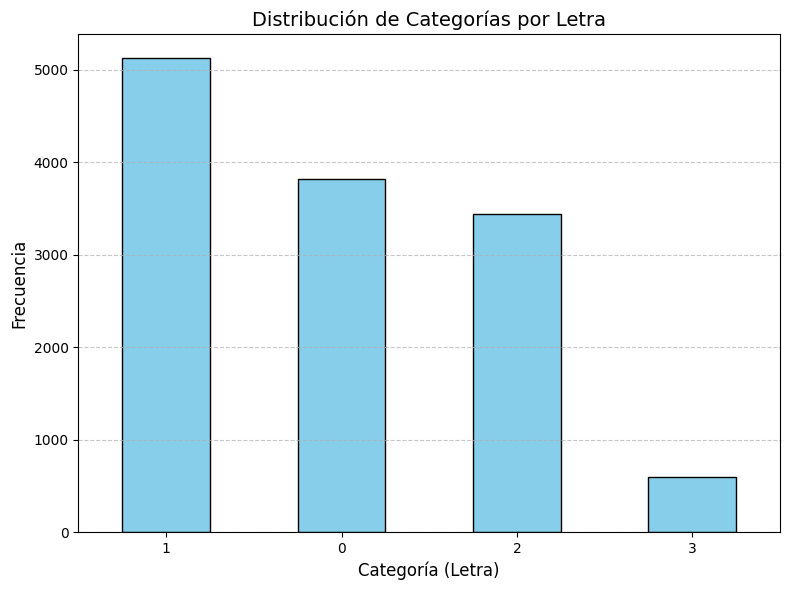

In [ ]:
# Contar la frecuencia de cada categoría en 'LetterMapped'
letter_counts = df['LetterMapped'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
letter_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de Categorías por Letra', fontsize=14)
plt.xlabel('Categoría (Letra)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

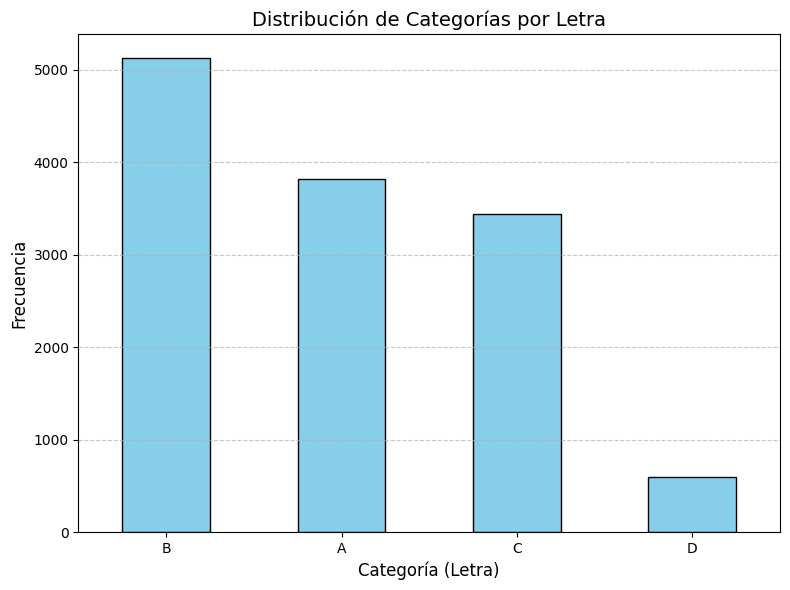

In [ ]:
# Contar la frecuencia de cada categoría en 'Grupo'
# Verificamos que los datos concuerden

letter_counts = df['Grupo'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
letter_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de Categorías por Letra', fontsize=14)
plt.xlabel('Categoría (Letra)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

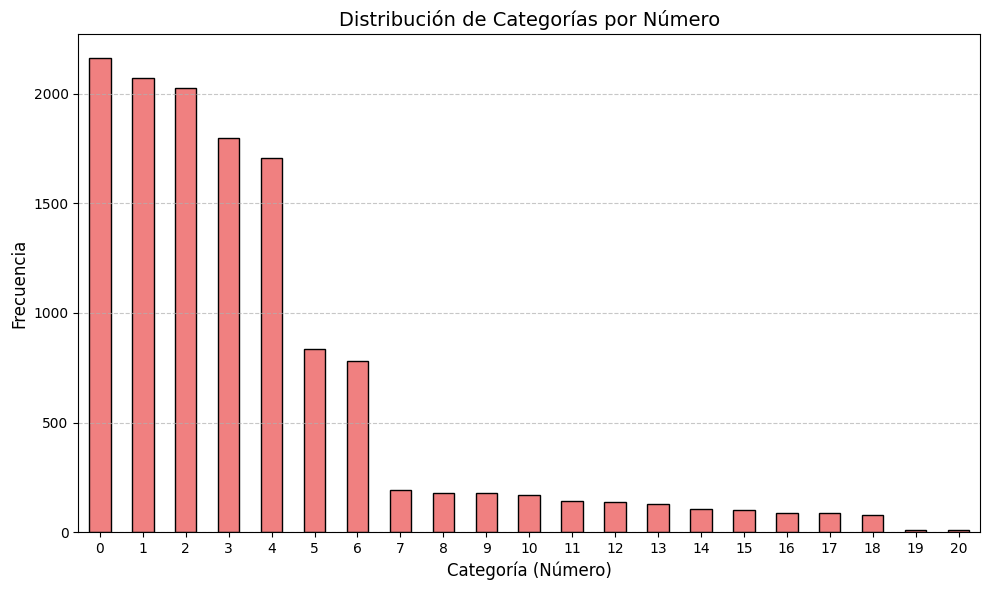

In [ ]:
number_counts = df['NumberMapped'].value_counts()

plt.figure(figsize=(10, 6))
number_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Distribución de Categorías por Número', fontsize=14)
plt.xlabel('Categoría (Número)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
stats_por_clase = df.groupby('Grupo').describe().T
stats_por_clase

Grupo                         A            B            C            D
num_paquete  count       3821.0       5127.0       3444.0        595.0
             mean   1462.413766  1381.059294  1311.938734  1117.396639
             min            2.0          2.0          2.0          2.0
             25%         1314.0       1282.0       1269.0       1110.0
             50%         1437.0       1420.0       1358.0       1348.0
...                         ...          ...          ...          ...
NumberMapped 25%            0.0          1.0          2.0          4.0
             50%            2.0          3.0          4.0          9.0
             75%            3.0          4.0         10.0         11.0
             max            4.0          6.0         18.0         20.0
             std       1.299397     1.932476     5.025192     4.762041

[1728 rows x 4 columns]

In [ ]:
df['Grupo'] = df['Grupo'].astype('category')

# 1.1 Selecciona columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# 1.2 Calcula media, mediana y desviación estándar por clase
resumen_num = df.groupby('Grupo')[num_cols].agg(['mean', 'median', 'std'])

# Opcional: renombra índices para más claridad
resumen_num.columns = ['_'.join(col) for col in resumen_num.columns]
resumen_num

,num_paquete_mean,num_paquete_median,num_paquete_std,num_ficha_mean,num_ficha_median,num_ficha_std,ide_ficha_origen_mean,ide_ficha_origen_median,ide_ficha_origen_std,ide_edificacion_mean,...,replicacion_std,C_mean,C_median,C_std,LetterMapped_mean,LetterMapped_median,LetterMapped_std,NumberMapped_mean,NumberMapped_median,NumberMapped_std
Grupo,,,,,,,,,,,,,,,,,,,,,
A,1462.413766,1437.0,307.012212,86056.157812,83954.0,43857.727374,6.841801e+19,6.841801e+19,4.449102e+12,0.807380,...,0.115876,3.795970,3.6,1.868425,0.0,0.0,0.0,1.656373,2.0,1.299397
B,1381.059294,1420.0,445.923158,81510.861517,78719.0,46684.879764,6.841801e+19,6.841801e+19,4.311523e+12,1.176321,...,0.126213,3.719807,3.6,1.676795,1.0,1.0,0.0,2.767505,3.0,1.932476
C,1311.938734,1358.0,471.600609,71614.396051,56785.0,45269.018235,6.841801e+19,6.841801e+19,4.436810e+12,1.039489,...,0.107158,2.813066,2.7,1.588412,2.0,2.0,0.0,5.935250,4.0,5.025192
D,1117.396639,1348.0,633.347794,63016.860504,50561.0,45781.429469,6.841801e+19,6.841801e+19,4.646124e+12,1.801681,...,0.091361,1.930336,2.1,1.363815,3.0,3.0,0.0,8.191597,9.0,4.762041


**4. Estadísticos por Clase**

In [ ]:
cols = [
    'ind_tiene_energia',
    'ind_tiene_alcantarillado',
    'ind_tiene_gas',
    'tip_vivienda',
    'num_cuartos_vivienda',
    'tip_uso_agua_beber',
    'ind_tiene_cocina',
    'ind_tiene_nevera',
    'ind_tiene_pc',
    'vlr_gasto_alimento',
    'ind_tiene_carro',
    'ind_tiene_moto',
    'ind_gasto_serv_publicos',
    'vlr_gasto_serv_publicos',
    'ind_gasto_educacion',
    'vlr_gasto_educacion',
    'ind_gasto_salud',
    'vlr_gasto_salud',
    'ind_gasto_arriendo',
    'vlr_gasto_arriendo',
    'vlr_total_gastos'
]

# Para cada columna imprime conteos absolutos y proporciones por clase
for col in cols:
    print(f"\n=== Variable: {col} ===")
    conteos = pd.crosstab(df['Grupo'], df[col])
    proporciones = pd.crosstab(df['Grupo'], df[col], normalize='index')

    display(conteos)       # Conteos absolutos
    display(proporciones)  # Proporciones dentro de cada clase


=== Variable: ind_tiene_energia ===


ind_tiene_energia,1,2
Grupo,,
A,3663,158
B,4974,153
C,3373,71
D,584,11


ind_tiene_energia,1,2
Grupo,,
A,0.958650,0.041350
B,0.970158,0.029842
C,0.979384,0.020616
D,0.981513,0.018487



=== Variable: ind_tiene_alcantarillado ===


ind_tiene_alcantarillado,1,2
Grupo,,
A,280,3541
B,581,4546
C,416,3028
D,93,502


ind_tiene_alcantarillado,1,2
Grupo,,
A,0.073279,0.926721
B,0.113322,0.886678
C,0.120790,0.879210
D,0.156303,0.843697



=== Variable: ind_tiene_gas ===


ind_tiene_gas,1,2
Grupo,,
A,138,3683
B,342,4785
C,209,3235
D,42,553


ind_tiene_gas,1,2
Grupo,,
A,0.036116,0.963884
B,0.066706,0.933294
C,0.060685,0.939315
D,0.070588,0.929412



=== Variable: tip_vivienda ===


tip_vivienda,1,2,3,4,5
Grupo,,,,,
A,2506,0,1304,11,0
B,4033,8,1080,4,2
C,2797,2,641,4,0
D,459,3,132,1,0


tip_vivienda,1,2,3,4,5
Grupo,,,,,
A,0.655849,0.000000,0.341272,0.002879,0.00000
B,0.786620,0.001560,0.210650,0.000780,0.00039
C,0.812137,0.000581,0.186121,0.001161,0.00000
D,0.771429,0.005042,0.221849,0.001681,0.00000



=== Variable: num_cuartos_vivienda ===


num_cuartos_vivienda,1,2,3,4,5,6,7
Grupo,,,,,,,
A,1387,1181,849,338,56,10,0
B,1376,1662,1320,610,114,35,10
C,841,1205,842,403,119,28,6
D,210,112,142,88,32,11,0


num_cuartos_vivienda,1,2,3,4,5,6,7
Grupo,,,,,,,
A,0.362994,0.309081,0.222193,0.088459,0.014656,0.002617,0.000000
B,0.268383,0.324166,0.257461,0.118978,0.022235,0.006827,0.001950
C,0.244193,0.349884,0.244483,0.117015,0.034553,0.008130,0.001742
D,0.352941,0.188235,0.238655,0.147899,0.053782,0.018487,0.000000



=== Variable: tip_uso_agua_beber ===


tip_uso_agua_beber,1,2,3,4,5,6
Grupo,,,,,,
A,3025,639,111,37,0,9
B,3761,1099,151,76,0,40
C,2472,677,182,73,2,38
D,422,113,13,18,0,29


tip_uso_agua_beber,1,2,3,4,5,6
Grupo,,,,,,
A,0.791678,0.167234,0.029050,0.009683,0.000000,0.002355
B,0.733567,0.214355,0.029452,0.014823,0.000000,0.007802
C,0.717770,0.196574,0.052846,0.021196,0.000581,0.011034
D,0.709244,0.189916,0.021849,0.030252,0.000000,0.048739



=== Variable: ind_tiene_cocina ===


ind_tiene_cocina,1,2
Grupo,,
A,2934,887
B,4318,809
C,2901,543
D,482,113


ind_tiene_cocina,1,2
Grupo,,
A,0.767862,0.232138
B,0.842208,0.157792
C,0.842334,0.157666
D,0.810084,0.189916



=== Variable: ind_tiene_nevera ===


ind_tiene_nevera,1,2
Grupo,,
A,1931,1890
B,3070,2057
C,2123,1321
D,282,313


ind_tiene_nevera,1,2
Grupo,,
A,0.505365,0.494635
B,0.598791,0.401209
C,0.616434,0.383566
D,0.473950,0.526050



=== Variable: ind_tiene_pc ===


ind_tiene_pc,1,2
Grupo,,
A,9,3812
B,45,5082
C,54,3390
D,46,549


ind_tiene_pc,1,2
Grupo,,
A,0.002355,0.997645
B,0.008777,0.991223
C,0.015679,0.984321
D,0.077311,0.922689



=== Variable: vlr_gasto_alimento ===


vlr_gasto_alimento,0,10000,12000,15000,20000,30000,40000,50000,55000,60000,...,700000,750000,800000,1000000,1800000,2000000,2000003,3500000,4000000,5030000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,119,3,0,6,4,7,4,63,1,23,...,18,0,33,4,0,0,0,0,2,0
B,137,0,0,1,0,5,2,86,0,21,...,20,0,13,5,4,0,0,4,0,0
C,80,0,0,0,4,0,0,20,0,11,...,25,0,34,5,0,1,4,0,0,2
D,28,1,2,0,1,0,0,5,0,3,...,5,3,10,0,0,0,0,0,0,0


vlr_gasto_alimento,0,10000,12000,15000,20000,30000,40000,50000,55000,60000,...,700000,750000,800000,1000000,1800000,2000000,2000003,3500000,4000000,5030000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.031144,0.000785,0.000000,0.001570,0.001047,0.001832,0.001047,0.016488,0.000262,0.006019,...,0.004711,0.000000,0.008636,0.001047,0.00000,0.00000,0.000000,0.00000,0.000523,0.000000
B,0.026721,0.000000,0.000000,0.000195,0.000000,0.000975,0.000390,0.016774,0.000000,0.004096,...,0.003901,0.000000,0.002536,0.000975,0.00078,0.00000,0.000000,0.00078,0.000000,0.000000
C,0.023229,0.000000,0.000000,0.000000,0.001161,0.000000,0.000000,0.005807,0.000000,0.003194,...,0.007259,0.000000,0.009872,0.001452,0.00000,0.00029,0.001161,0.00000,0.000000,0.000581
D,0.047059,0.001681,0.003361,0.000000,0.001681,0.000000,0.000000,0.008403,0.000000,0.005042,...,0.008403,0.005042,0.016807,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000



=== Variable: ind_tiene_carro ===


ind_tiene_carro,1,2
Grupo,,
A,25,3796
B,76,5051
C,89,3355
D,56,539


ind_tiene_carro,1,2
Grupo,,
A,0.006543,0.993457
B,0.014823,0.985177
C,0.025842,0.974158
D,0.094118,0.905882



=== Variable: ind_tiene_moto ===


ind_tiene_moto,1,2
Grupo,,
A,289,3532
B,647,4480
C,487,2957
D,106,489


ind_tiene_moto,1,2
Grupo,,
A,0.075635,0.924365
B,0.126195,0.873805
C,0.141405,0.858595
D,0.178151,0.821849



=== Variable: ind_gasto_serv_publicos ===


ind_gasto_serv_publicos,1,2,9
Grupo,,,
A,3363,454,4
B,4708,413,6
C,3114,327,3
D,502,93,0


ind_gasto_serv_publicos,1,2,9
Grupo,,,
A,0.880136,0.118817,0.001047
B,0.918276,0.080554,0.001170
C,0.904181,0.094948,0.000871
D,0.843697,0.156303,0.000000



=== Variable: vlr_gasto_serv_publicos ===


vlr_gasto_serv_publicos,0,329,600,1200,2000,2700,3000,4000,4200,5000,...,400000,430000,450000,500000,600000,620000,700000,800000,1400000,2000003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,458,1,0,4,5,5,5,1,0,83,...,0,0,0,0,0,0,0,0,0,0
B,419,0,7,0,10,0,12,7,3,59,...,4,0,0,4,11,0,1,9,0,0
C,330,0,0,2,0,0,2,1,0,34,...,10,3,3,0,2,3,0,1,4,2
D,93,0,0,0,0,0,1,2,0,10,...,0,0,0,0,0,0,0,0,0,0


vlr_gasto_serv_publicos,0,329,600,1200,2000,2700,3000,4000,4200,5000,...,400000,430000,450000,500000,600000,620000,700000,800000,1400000,2000003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.119864,0.000262,0.000000,0.001047,0.001309,0.001309,0.001309,0.000262,0.000000,0.021722,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B,0.081724,0.000000,0.001365,0.000000,0.001950,0.000000,0.002341,0.001365,0.000585,0.011508,...,0.000780,0.000000,0.000000,0.00078,0.002146,0.000000,0.000195,0.001755,0.000000,0.000000
C,0.095819,0.000000,0.000000,0.000581,0.000000,0.000000,0.000581,0.000290,0.000000,0.009872,...,0.002904,0.000871,0.000871,0.00000,0.000581,0.000871,0.000000,0.000290,0.001161,0.000581
D,0.156303,0.000000,0.000000,0.000000,0.000000,0.000000,0.001681,0.003361,0.000000,0.016807,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



=== Variable: ind_gasto_educacion ===


ind_gasto_educacion,1,2,9
Grupo,,,
A,756,3049,16
B,1108,3985,34
C,693,2722,29
D,76,518,1


ind_gasto_educacion,1,2,9
Grupo,,,
A,0.197854,0.797959,0.004187
B,0.216111,0.777258,0.006632
C,0.201220,0.790360,0.008420
D,0.127731,0.870588,0.001681



=== Variable: vlr_gasto_educacion ===


vlr_gasto_educacion,0,2000,5000,6000,7000,8000,10000,15000,20000,23000,...,600000,650000,667000,700000,850000,900000,1000000,1300000,1421000,2100000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,3065,3,0,4,0,7,33,12,23,6,...,3,0,0,0,0,0,0,0,0,0
B,4019,0,5,0,0,0,9,9,112,0,...,3,0,0,0,0,0,5,0,0,0
C,2751,0,0,0,4,0,8,0,40,0,...,0,5,0,3,0,1,0,0,4,3
D,519,0,0,0,0,0,0,0,0,0,...,0,3,3,0,1,0,0,2,0,0


vlr_gasto_educacion,0,2000,5000,6000,7000,8000,10000,15000,20000,23000,...,600000,650000,667000,700000,850000,900000,1000000,1300000,1421000,2100000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.802146,0.000785,0.000000,0.001047,0.000000,0.001832,0.008636,0.003141,0.006019,0.00157,...,0.000785,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
B,0.783889,0.000000,0.000975,0.000000,0.000000,0.000000,0.001755,0.001755,0.021845,0.00000,...,0.000585,0.000000,0.000000,0.000000,0.000000,0.00000,0.000975,0.000000,0.000000,0.000000
C,0.798780,0.000000,0.000000,0.000000,0.001161,0.000000,0.002323,0.000000,0.011614,0.00000,...,0.000000,0.001452,0.000000,0.000871,0.000000,0.00029,0.000000,0.000000,0.001161,0.000871
D,0.872269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.005042,0.005042,0.000000,0.001681,0.00000,0.000000,0.003361,0.000000,0.000000



=== Variable: ind_gasto_salud ===


ind_gasto_salud,1,2,9
Grupo,,,
A,430,3383,8
B,804,4287,36
C,674,2713,57
D,146,436,13


ind_gasto_salud,1,2,9
Grupo,,,
A,0.112536,0.885370,0.002094
B,0.156817,0.836161,0.007022
C,0.195703,0.787747,0.016551
D,0.245378,0.732773,0.021849



=== Variable: vlr_gasto_salud ===


vlr_gasto_salud,0,4000,5000,6000,8000,10000,12000,14000,15000,16000,...,300000,334000,400000,430000,440000,500000,600000,735000,2000000,2500000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,3391,0,0,4,3,29,6,1,0,2,...,6,0,0,0,0,0,0,0,0,0
B,4323,7,0,0,0,18,4,0,2,0,...,26,0,3,0,4,4,3,2,0,0
C,2770,0,2,0,0,14,0,0,0,0,...,12,0,6,4,0,1,0,0,2,0
D,449,0,0,0,0,0,0,0,1,0,...,2,2,2,0,0,4,2,0,0,1


vlr_gasto_salud,0,4000,5000,6000,8000,10000,12000,14000,15000,16000,...,300000,334000,400000,430000,440000,500000,600000,735000,2000000,2500000
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.887464,0.000000,0.000000,0.001047,0.000785,0.007590,0.00157,0.000262,0.000000,0.000523,...,0.001570,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
B,0.843183,0.001365,0.000000,0.000000,0.000000,0.003511,0.00078,0.000000,0.000390,0.000000,...,0.005071,0.000000,0.000585,0.000000,0.00078,0.000780,0.000585,0.00039,0.000000,0.000000
C,0.804297,0.000000,0.000581,0.000000,0.000000,0.004065,0.00000,0.000000,0.000000,0.000000,...,0.003484,0.000000,0.001742,0.001161,0.00000,0.000290,0.000000,0.00000,0.000581,0.000000
D,0.754622,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001681,0.000000,...,0.003361,0.003361,0.003361,0.000000,0.00000,0.006723,0.003361,0.00000,0.000000,0.001681



=== Variable: ind_gasto_arriendo ===


ind_gasto_arriendo,1,2,9
Grupo,,,
A,2064,1745,12
B,2712,2394,21
C,1637,1795,12
D,224,371,0


ind_gasto_arriendo,1,2,9
Grupo,,,
A,0.540173,0.456687,0.003141
B,0.528964,0.466940,0.004096
C,0.475319,0.521196,0.003484
D,0.376471,0.623529,0.000000



=== Variable: vlr_gasto_arriendo ===


vlr_gasto_arriendo,0,6000,10000,12000,15000,20000,24000,25000,30000,40000,...,1100000,1200000,1200003,1500000,1700003,1850002,2000001,2500003,3000002,9000003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,1757,5,3,0,0,11,0,0,30,6,...,4,0,3,0,0,0,2,5,0,0
B,2415,4,0,0,0,12,4,2,11,2,...,0,0,0,0,1,0,0,3,4,0
C,1807,0,0,1,2,1,0,0,7,2,...,0,2,0,4,0,2,0,0,0,5
D,371,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


vlr_gasto_arriendo,0,6000,10000,12000,15000,20000,24000,25000,30000,40000,...,1100000,1200000,1200003,1500000,1700003,1850002,2000001,2500003,3000002,9000003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.459827,0.001309,0.000785,0.00000,0.000000,0.002879,0.00000,0.00000,0.007851,0.001570,...,0.001047,0.000000,0.000785,0.000000,0.000000,0.000000,0.000523,0.001309,0.00000,0.000000
B,0.471036,0.000780,0.000000,0.00000,0.000000,0.002341,0.00078,0.00039,0.002146,0.000390,...,0.000000,0.000000,0.000000,0.000000,0.000195,0.000000,0.000000,0.000585,0.00078,0.000000
C,0.524681,0.000000,0.000000,0.00029,0.000581,0.000290,0.00000,0.00000,0.002033,0.000581,...,0.000000,0.000581,0.000000,0.001161,0.000000,0.000581,0.000000,0.000000,0.00000,0.001452
D,0.623529,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.006723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000



=== Variable: vlr_total_gastos ===


vlr_total_gastos,0,2000,5000,8000,9000,10000,15000,16000,18000,20000,...,4410003,4620000,4650000,4850000,5060000,5360000,5385000,6599000,8928400,9550003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,23,0,0,1,5,1,2,0,3,0,...,0,0,0,2,0,0,3,0,0,0
B,30,2,1,0,0,1,2,2,1,6,...,0,4,0,0,0,0,0,0,0,0
C,13,0,0,0,0,0,0,0,0,3,...,0,0,4,0,0,2,0,0,3,5
D,9,0,0,0,0,1,0,0,0,1,...,6,0,0,0,1,0,0,1,0,0


vlr_total_gastos,0,2000,5000,8000,9000,10000,15000,16000,18000,20000,...,4410003,4620000,4650000,4850000,5060000,5360000,5385000,6599000,8928400,9550003
Grupo,,,,,,,,,,,,,,,,,,,,,
A,0.006019,0.00000,0.000000,0.000262,0.001309,0.000262,0.000523,0.00000,0.000785,0.000000,...,0.000000,0.00000,0.000000,0.000523,0.000000,0.000000,0.000785,0.000000,0.000000,0.000000
B,0.005851,0.00039,0.000195,0.000000,0.000000,0.000195,0.000390,0.00039,0.000195,0.001170,...,0.000000,0.00078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.003775,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000871,...,0.000000,0.00000,0.001161,0.000000,0.000000,0.000581,0.000000,0.000000,0.000871,0.001452
D,0.015126,0.00000,0.000000,0.000000,0.000000,0.001681,0.000000,0.00000,0.000000,0.001681,...,0.010084,0.00000,0.000000,0.000000,0.001681,0.000000,0.000000,0.001681,0.000000,0.000000


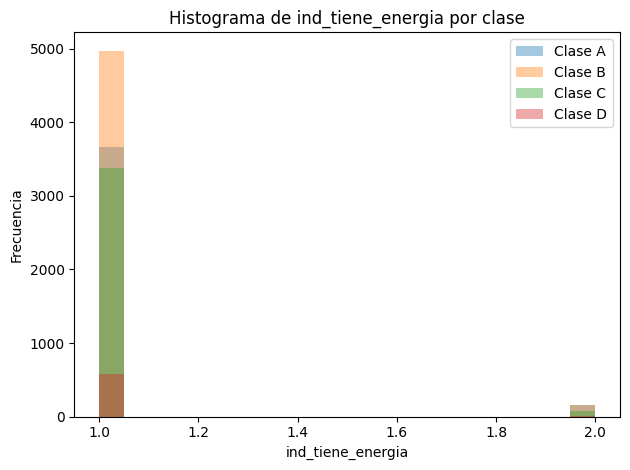

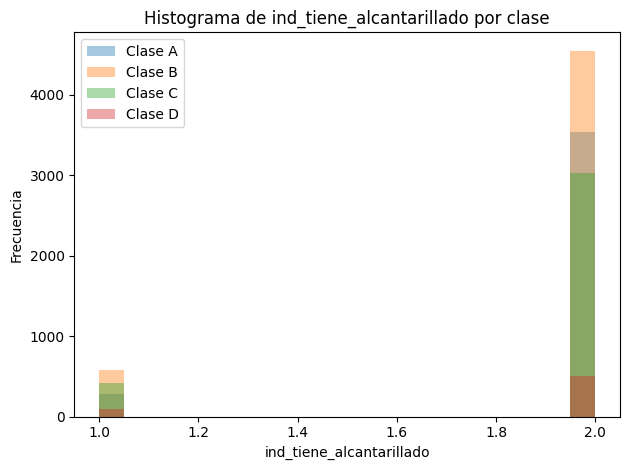

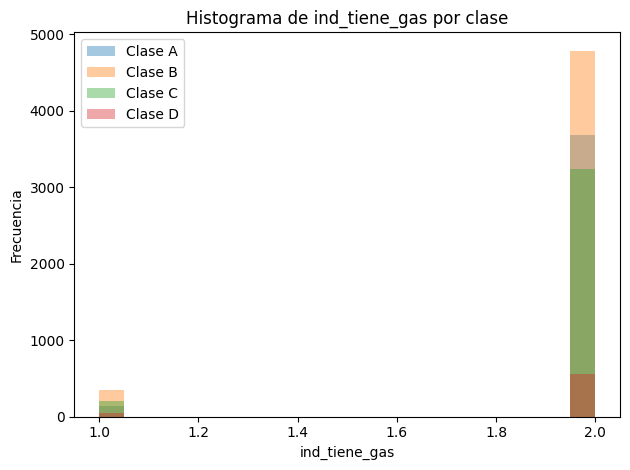

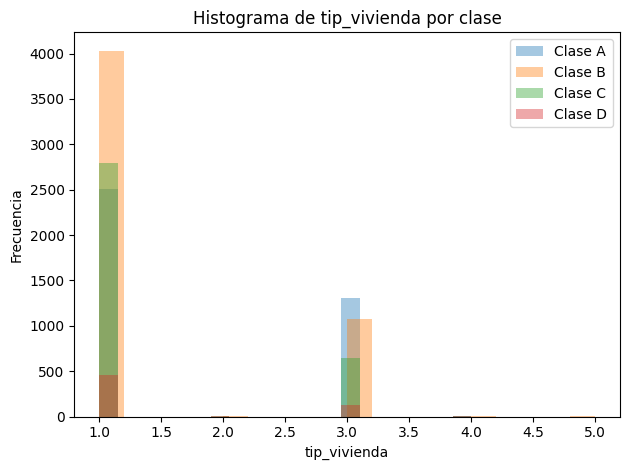

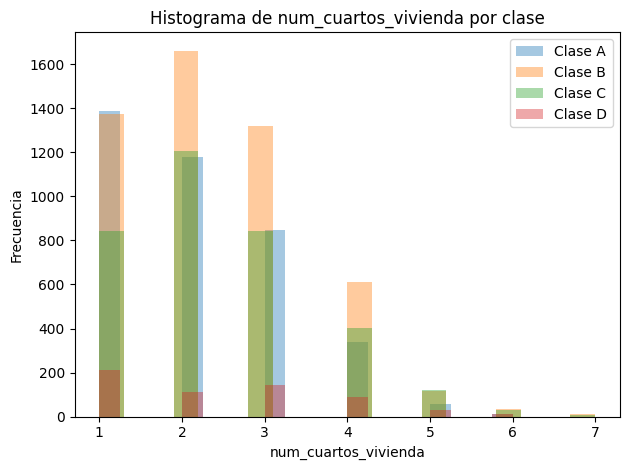

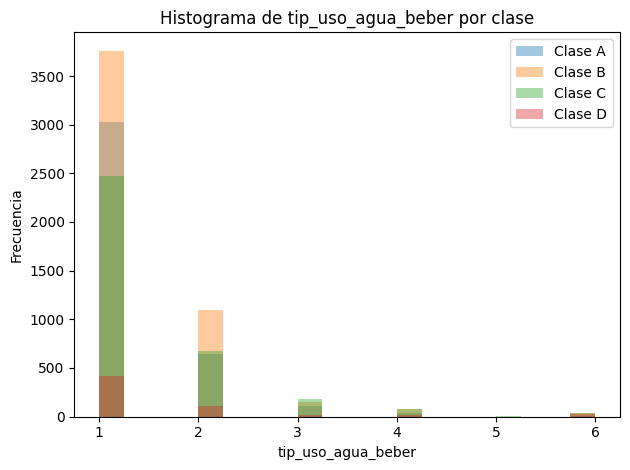

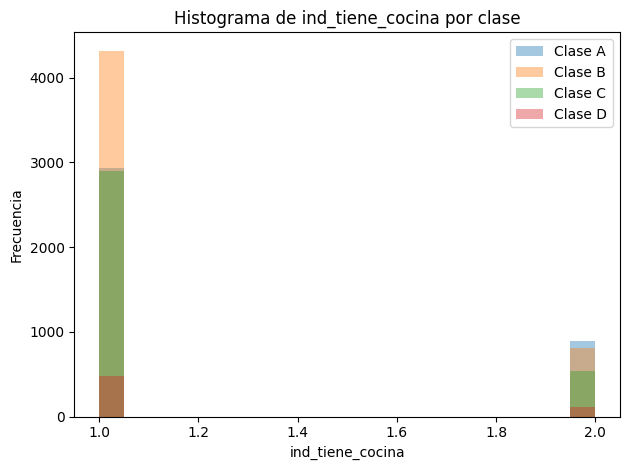

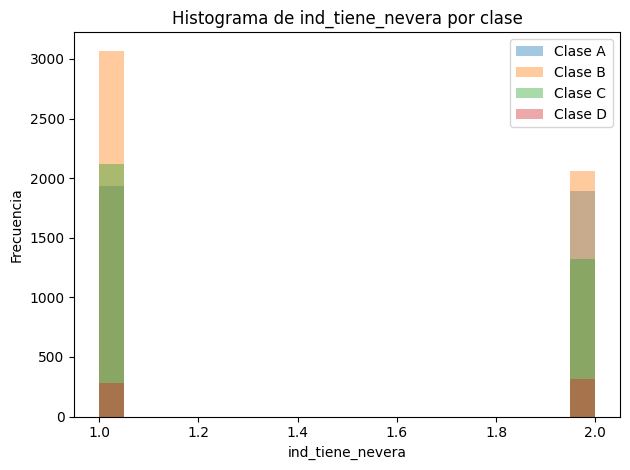

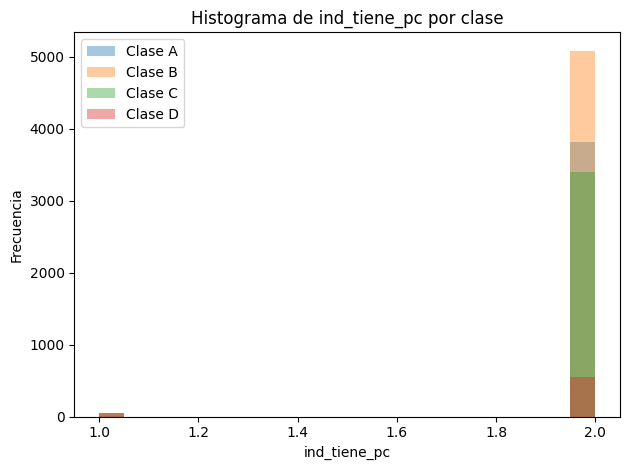

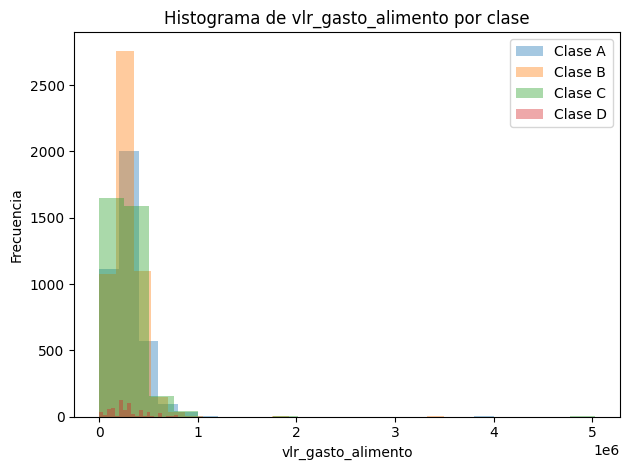

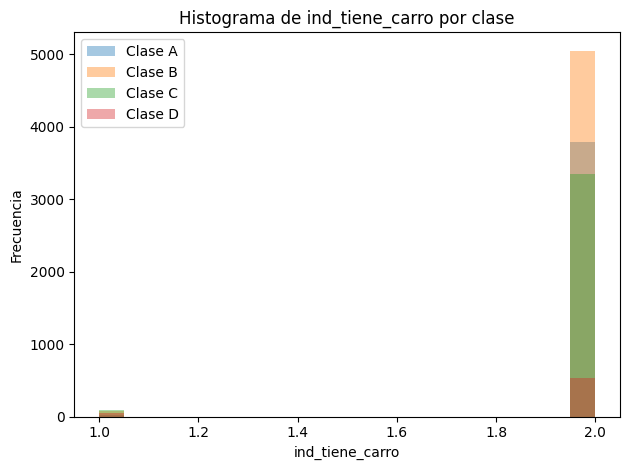

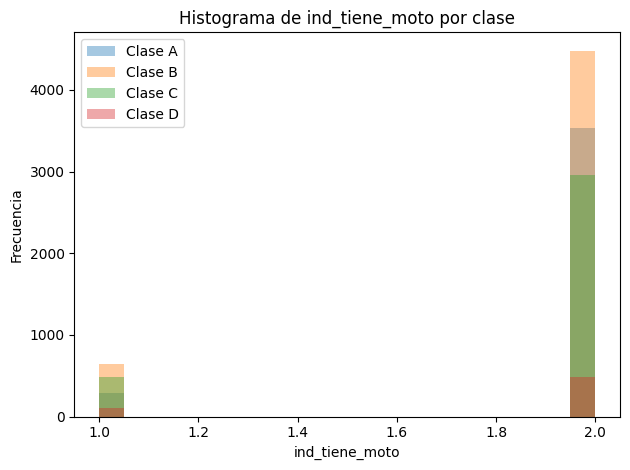

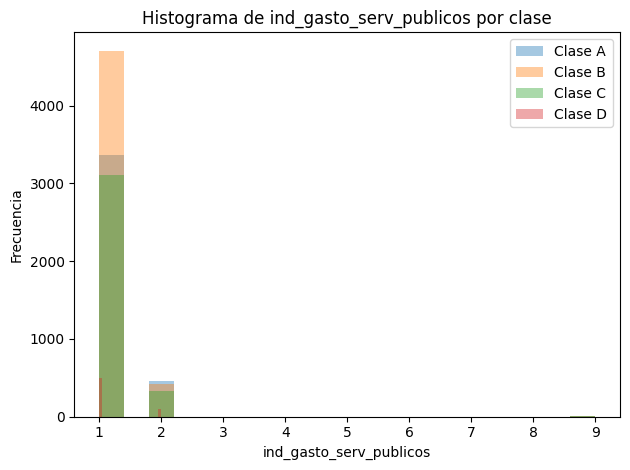

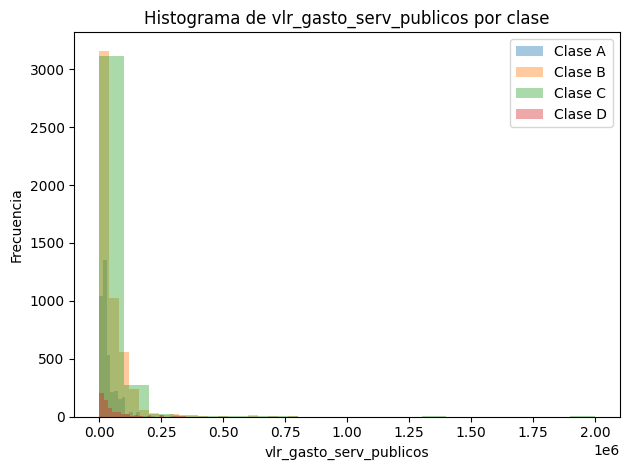

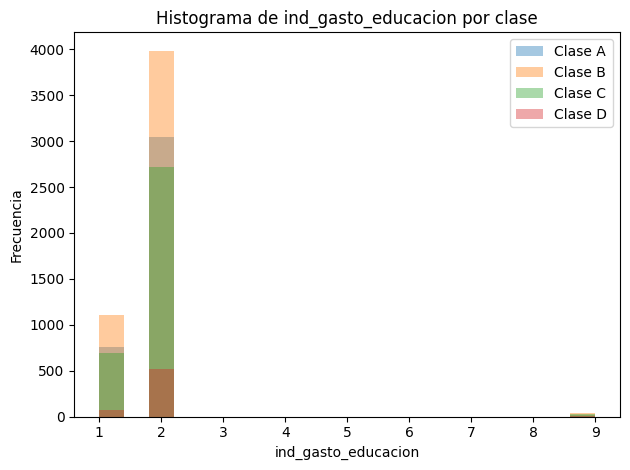

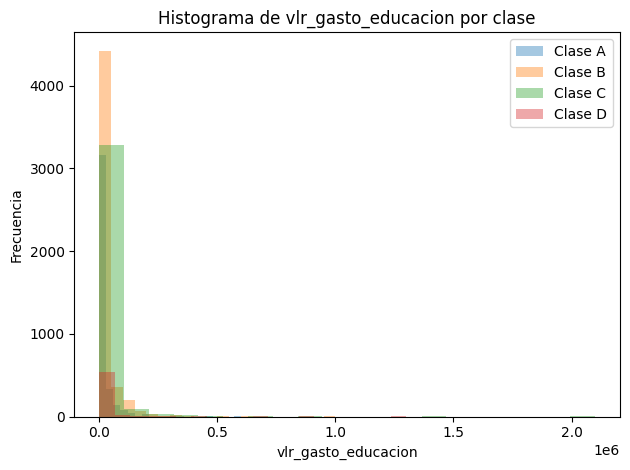

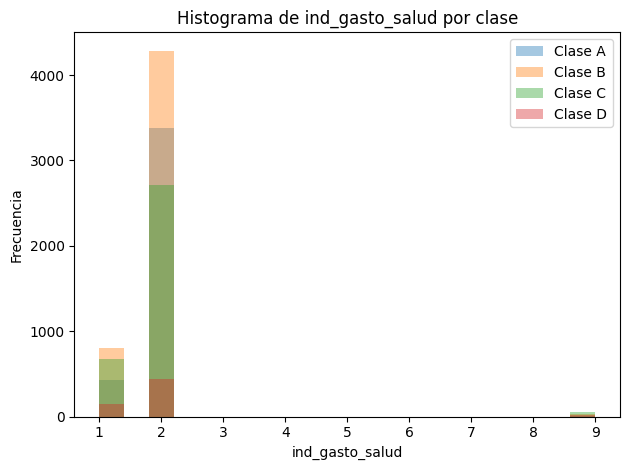

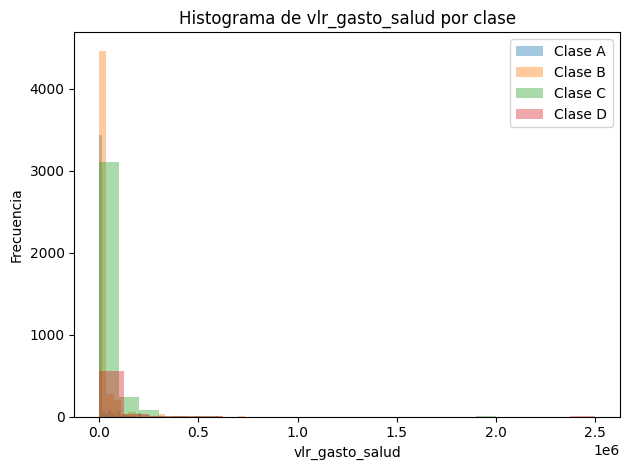

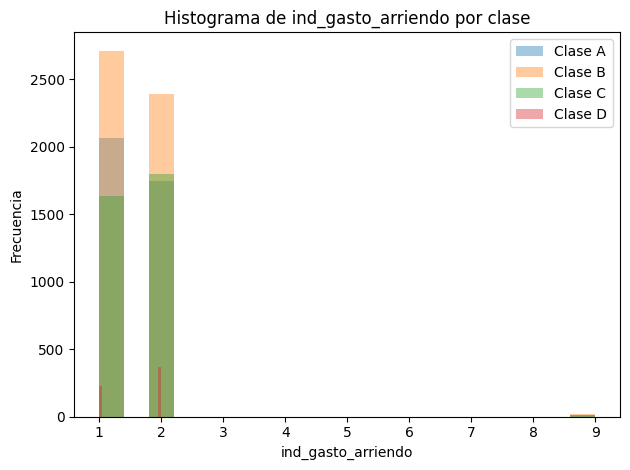

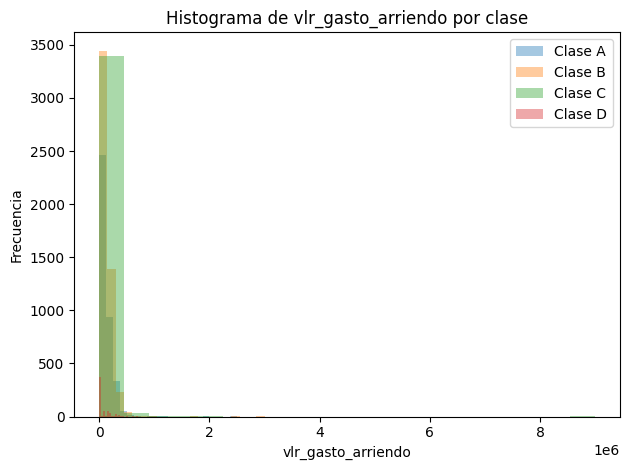

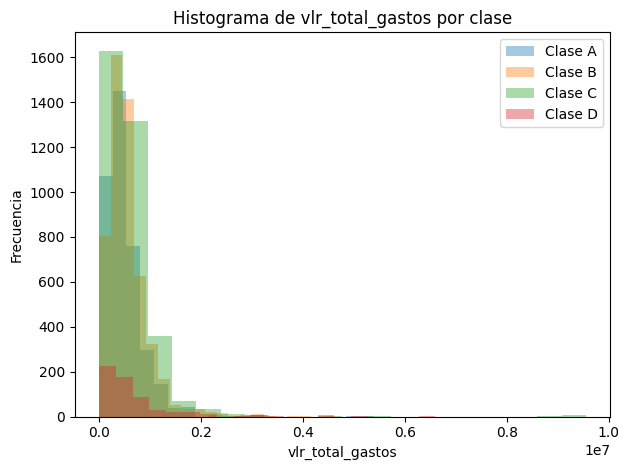

In [ ]:
# Detecta automáticamente el tipo de cada columna
num_cols = df[cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in cols if c not in num_cols]

# Función para graficar cada variable por clase
def graficar_por_tipo(df, var):
    categorias = df['Grupo'].cat.categories
    if var in num_cols:
        # Histograma superpuesto
        fig, ax = plt.subplots()
        for clase in categorias:
            datos = df.loc[df['Grupo'] == clase, var].dropna()
            ax.hist(datos, bins=20, alpha=0.4, label=f'Clase {clase}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
        ax.set_title(f'Histograma de {var} por clase')
        ax.legend()
        plt.tight_layout()
        plt.show()
    else:
        # Barras de proporciones
        prop = pd.crosstab(df['Grupo'], df[var], normalize='index')
        fig, ax = plt.subplots()
        prop.plot(kind='bar', ax=ax)
        ax.set_ylabel('Proporción')
        ax.set_title(f'Proporción de {var} por clase')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# Ejecuta la función para cada variable
for col in cols:
    graficar_por_tipo(df, col)

In [ ]:
for col in cat_cols:
    # Normalizamos todo a cadena
    df[col] = df[col].astype(str)

    print(f"\n=== Variable: {col} ===")
    conteos = pd.crosstab(df['Grupo'], df[col])
    proporciones = pd.crosstab(df['Grupo'], df[col], normalize='index')
    display(conteos)
    display(proporciones)


In [ ]:
# Estadísticas numéricas “aplanadas”
stats_num_flat = resumen_num.reset_index()

# Para cada categórica construye un mini-DataFrame y agréga
for col in cat_cols:
    pct = pd.crosstab(df['Grupo'], df[col], normalize='index') \
            .add_prefix(f"{col}_pct_") \
            .reset_index()
    stats_num_flat = stats_num_flat.merge(pct, on='Grupo', how='left')

stats_num_flat

,Grupo,num_paquete_mean,num_paquete_median,num_paquete_std,num_ficha_mean,num_ficha_median,num_ficha_std,ide_ficha_origen_mean,ide_ficha_origen_median,ide_ficha_origen_std,...,replicacion_std,C_mean,C_median,C_std,LetterMapped_mean,LetterMapped_median,LetterMapped_std,NumberMapped_mean,NumberMapped_median,NumberMapped_std
0,A,1462.413766,1437.0,307.012212,86056.157812,83954.0,43857.727374,6.841801e+19,6.841801e+19,4.449102e+12,...,0.115876,3.795970,3.6,1.868425,0.0,0.0,0.0,1.656373,2.0,1.299397
1,B,1381.059294,1420.0,445.923158,81510.861517,78719.0,46684.879764,6.841801e+19,6.841801e+19,4.311523e+12,...,0.126213,3.719807,3.6,1.676795,1.0,1.0,0.0,2.767505,3.0,1.932476
2,C,1311.938734,1358.0,471.600609,71614.396051,56785.0,45269.018235,6.841801e+19,6.841801e+19,4.436810e+12,...,0.107158,2.813066,2.7,1.588412,2.0,2.0,0.0,5.935250,4.0,5.025192
3,D,1117.396639,1348.0,633.347794,63016.860504,50561.0,45781.429469,6.841801e+19,6.841801e+19,4.646124e+12,...,0.091361,1.930336,2.1,1.363815,3.0,3.0,0.0,8.191597,9.0,4.762041


# Teniendo en cuenta el feedback de la profesora

Crear nuevas columnas con los datos

Dir vivienda

Nombres para poder revisar si es de una misma familia o no

Categorizar antes de

Organizarlo todo por veredas

Grupo A (VIVIENDA):

Cada fila “Grupo A” contiene información a nivel de vivienda (características físicas de la edificación, número de cuartos, uso de la vivienda, material de construcción, estrato, etc.).

Típicamente hay una sola fila de Grupo A por cada vivienda (por cada dirección).

Grupo B (HOGAR):

Cada fila “Grupo B” es un registro a nivel de hogar (un conjunto de personas que comparten vivienda).

Si en una vivienda hay más de un hogar (por ejemplo, dos familias independientes que comparten una misma casa), habrá tantas filas de Grupo B como hogares.

Grupo C (PERSONA):

Cada fila “Grupo C” es un registro individual, es decir, un miembro del hogar.

Aquí aparecen variables como nombre, apellido, fecha de nacimiento, sexo, nivel educativo, ocupación, relación con el jefe de hogar (hijo, cónyuge, etc.), estado civil, etc.

Debe haber tantas filas C como personas censadas en el conjunto de hogares.

Grupo D (SERVICIOS/EQUIPAMIENTO):

Cada fila “Grupo D” suele ir asociada de nuevo a la misma vivienda u hogar, pero enfocado en pantallas especiales (por ejemplo, servicios públicos adicionales, equipamiento del hogar, canal de agua potable, tipo de alcantarillado, bienes durables, etc.).

In [ ]:
# Importamos el dataset a google drive, y lo importamos desde ahí

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/CENSO POBLACIONAL AGOSTO.xlsx'

df = pd.read_excel(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [ ]:
df['Nombre_completo'] = (
    df['pri_nombre'].fillna('') + ' ' +
    df['seg_nombre'].fillna('') + ' ' +
    df['pri_apellido'].fillna('') + ' ' +
    df['seg_apellido'].fillna('')
).str.strip()
df['Apellido_principal'] = df['pri_apellido'].fillna('')

In [ ]:
df['Calle'] = df['Dir_vivienda'].astype(str).str.split(',', expand=True)[0].str.strip()
df['Numero'] = df['Dir_vivienda'].astype(str).str.extract(r'(\d+)').fillna('').astype(str)

In [ ]:
df['Family_ID'] = df['Calle'] + '_' + df['Apellido_principal']

In [ ]:
for grp in ['A','B','C','D']:
    df[f'is_Grupo_{grp}'] = (df['Grupo'] == grp).astype(int)

In [ ]:
df_sorted = df.sort_values(
    by=['NOM_VEREDA', 'Calle', 'Numero', 'Apellido_principal'])

In [ ]:
new_cols = [
    'NOM_VEREDA', 'Dir_vivienda', 'Calle', 'Numero', 'Family_ID',
    'Nombre_completo', 'Apellido_principal',
    'is_Grupo_A', 'is_Grupo_B', 'is_Grupo_C', 'is_Grupo_D'
]
df_sorted[new_cols].head(20)

,NOM_VEREDA,Dir_vivienda,Calle,Numero,Family_ID,Nombre_completo,Apellido_principal,is_Grupo_A,is_Grupo_B,is_Grupo_C,is_Grupo_D
11539,DELICIAS,BARRIO LAS NIEVES,BARRIO LAS NIEVES,,BARRIO LAS NIEVES_MARTINEZ,ALEXANDER MARTINEZ RONDON,MARTINEZ,0,0,1,0
11541,DELICIAS,BARRIO LAS NIEVES,BARRIO LAS NIEVES,,BARRIO LAS NIEVES_MARTINEZ,LIAM ALEXANDER MARTINEZ RIOS,MARTINEZ,0,0,1,0
11542,DELICIAS,BARRIO LAS NIEVES,BARRIO LAS NIEVES,,BARRIO LAS NIEVES_MARTINEZ,EMILY NATALIA MARTINEZ RIOS,MARTINEZ,0,0,1,0
11540,DELICIAS,BARRIO LAS NIEVES,BARRIO LAS NIEVES,,BARRIO LAS NIEVES_RIOS,JENNYFER ALEXANDRA RIOS ESPINOSA,RIOS,0,0,1,0
1477,DELICIAS,BARRIO LAS NIEVES SEC LOS FERREIRA,BARRIO LAS NIEVES SEC LOS FERREIRA,,BARRIO LAS NIEVES SEC LOS FERREIRA_MARTINEZ,MARTHA ELISA MARTINEZ CALDERON,MARTINEZ,0,1,0,0
1479,DELICIAS,BARRIO LAS NIEVES SEC LOS FERREIRA,BARRIO LAS NIEVES SEC LOS FERREIRA,,BARRIO LAS NIEVES SEC LOS FERREIRA_MORENO,EDGAR MAURICIO MORENO MARTINEZ,MORENO,0,1,0,0
1478,DELICIAS,BARRIO LAS NIEVES SEC LOS FERREIRA,BARRIO LAS NIEVES SEC LOS FERREIRA,,BARRIO LAS NIEVES SEC LOS FERREIRA_ROSALES,DAVID SANTIAGO ROSALES MARTINEZ,ROSALES,0,1,0,0
2521,DELICIAS,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES,,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES_...,JULIETH SOFIA PERNIA DAVILA,PERNIA,0,0,0,1
2522,DELICIAS,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES,,DETRÁS TIENDA LAS DELICIAS - SEÑORA MERCEDES_...,JUNIOR DANIEL PERNIA MOJICA,PERNIA,0,0,0,1
7366,DELICIAS,EL JUMBO-DELICIAS,EL JUMBO-DELICIAS,,EL JUMBO-DELICIAS_CARRILLO,YOLANDA CARRILLO JAIMES,CARRILLO,0,1,0,0


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

#Detección de outliers en 'Edad' por IQR
Q1 = df['edad_calculada'].quantile(0.25)
Q3 = df['edad_calculada'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
# Aquí se marcan como outliers aquellas edades < lower o > upper
df['Es_outlier_edad'] = ((df['edad_calculada'] < lower) | (df['edad_calculada'] > upper)).astype(int)

# Detección de outliers en 'Ingreso_mensual' por z-score
# Primero quito nulos para no distorsionar la media/desviación
ingreso_sin_nulos = df['vlr_ingr_salario'].dropna()
z_scores = stats.zscore(ingreso_sin_nulos)
# Reconstruyo un Series con índices
ser_z = pd.Series(z_scores, index=ingreso_sin_nulos.index)
df.loc[ser_z.index, 'z_ingreso'] = ser_z
# Considero outliers si |z| > 3
df['Es_outlier_ingreso'] = (df['z_ingreso'].abs() > 3).astype(int)

In [ ]:
from sklearn.impute import KNNImputer
# Limpieza de valores nulos

#Si 'Edad' tiene pocos nulos (< 5%):
#     usamos la mediana (robusta ante posibles outliers que ya marcamos).
mediana_edad = df['edad_calculada'].median()
df['edad_calculada'] = df['edad_calculada'].fillna(mediana_edad)

#'Ingreso_mensual' está muy sesgado (cola larga), por eso también imputamos con mediana:
mediana_ing = df['vlr_ingr_salario'].median()
df['vlr_ingr_salario'] = df['vlr_ingr_salario'].fillna(mediana_ing)

#'Estrato' es categórico (1–6). Reemplazo por la moda.
moda_estrato = df['tip_estrato_energia'].mode()[0]
df['tip_estrato_energia'] = df['tip_estrato_energia'].fillna(moda_estrato)

#'Num_cuartos' es discreto, con algunos valores faltantes. Como no es muy asimétrico,
#       podríamos usar la media, pero revisamos su distribución primero:
print(df['num_cuartos_vivienda'].describe())

# Si la distribución es muy sesgada (por ej. la mayoría vive en 1 ó 2 cuartos), usar mediana.
mediana_cuartos = df['num_cuartos_vivienda'].median()
df['num_cuartos_vivienda'] = df['num_cuartos_vivienda'].fillna(mediana_cuartos)

#Si hubieran múltiples columnas numéricas con nulos y queremos unificar:
knn_imp = KNNImputer(n_neighbors=5)
cols_para_knn = ['edad_calculada', 'vlr_ingr_salario', 'tot_hogares', 'num_cuartos_vivienda']
df[cols_para_knn] = knn_imp.fit_transform(df[cols_para_knn])

count    12987.000000
mean         2.276892
std          1.122426
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: num_cuartos_vivienda, dtype: float64


In [ ]:
# Quitar filas con outliers extremos marcados (por ejemplo, todas las filas donde
df_limpio = df[~((df['Es_outlier_edad'] == 1) & (df['Es_outlier_ingreso'] == 1))].copy()

In [ ]:
cols_vivienda = ['num_cuartos_vivienda', 'tip_estrato_energia']
cols_hogar    = ['tot_hogares', 'vlr_ingr_salario']
cols_persona  = ['edad_calculada', 'niv_educativo']
cols_servicios = ['vlr_gasto_serv_publicos', 'ind_tiene_bien_raiz']

# Preparo un diccionario para agrupar por cada grupo
from collections import OrderedDict

metricas_por_grupo = OrderedDict([
    ('A', cols_vivienda),
    ('B', cols_hogar),
    ('C', cols_persona),
    ('D', cols_servicios)
])

# Función auxiliar para obtener estadísticos descriptivos básicos
def resumen_estadistico_por_cols(df_sub, columnas):
    """
    Para un DataFrame df_sub y una lista de columnas numéricas,
    devuelve un DataFrame con count, mean, median, std, min y max.
    """
    resumen = {}
    for col in columnas:
        serie = df_sub[col].dropna()
        resumen[col] = {
            'count':   serie.count(),
            'mean':    serie.mean(),
            'median':  serie.median(),
            'std':     serie.std(),
            'min':     serie.min(),
            'max':     serie.max()
        }
    return pd.DataFrame(resumen).T[['count','mean','median','std','min','max']]

# Calculo para cada grupo y guardo resultados
resultados = {}
for grupo, cols in metricas_por_grupo.items():
    sub = df[df['Grupo'] == grupo]
    if len(sub) == 0:
        continue
    resultados[grupo] = resumen_estadistico_por_cols(sub, cols)

In [ ]:
# Variables a analizar
cols_vivienda   = ['num_cuartos_vivienda', 'tip_estrato_energia']
cols_hogar      = ['tot_hogares', 'vlr_ingr_salario']
cols_persona    = ['edad_calculada', 'niv_educativo']
cols_servicios  = ['vlr_gasto_serv_publicos', 'ind_tiene_bien_raiz']

# Diccionario de variables por grupo
from collections import OrderedDict
metricas_por_grupo = OrderedDict([
    ('A', cols_vivienda),
    ('B', cols_hogar),
    ('C', cols_persona),
    ('D', cols_servicios)
])

# Función para cálculo de estadísticas
def resumen_estadistico_por_cols(df_sub, columnas):
    resumen = {}
    for col in columnas:
        serie = df_sub[col].dropna()
        resumen[col] = {
            'count':  serie.count(),
            'mean':   serie.mean(),
            'median': serie.median(),
            'std':    serie.std(),
            'min':    serie.min(),
            'max':    serie.max()
        }
    return pd.DataFrame(resumen).T[['count','mean','median','std','min','max']]

# Recorremos cada vereda y cada grupo
resultados_por_vereda = {}
for vereda, df_vereda in df.groupby('NOM_VEREDA'):
    resultados_por_vereda[vereda] = {}
    for grupo, cols in metricas_por_grupo.items():
        df_grupo = df_vereda[df_vereda['Grupo'] == grupo]
        if not df_grupo.empty:
            resultados_por_vereda[vereda][grupo] = resumen_estadistico_por_cols(df_grupo, cols)


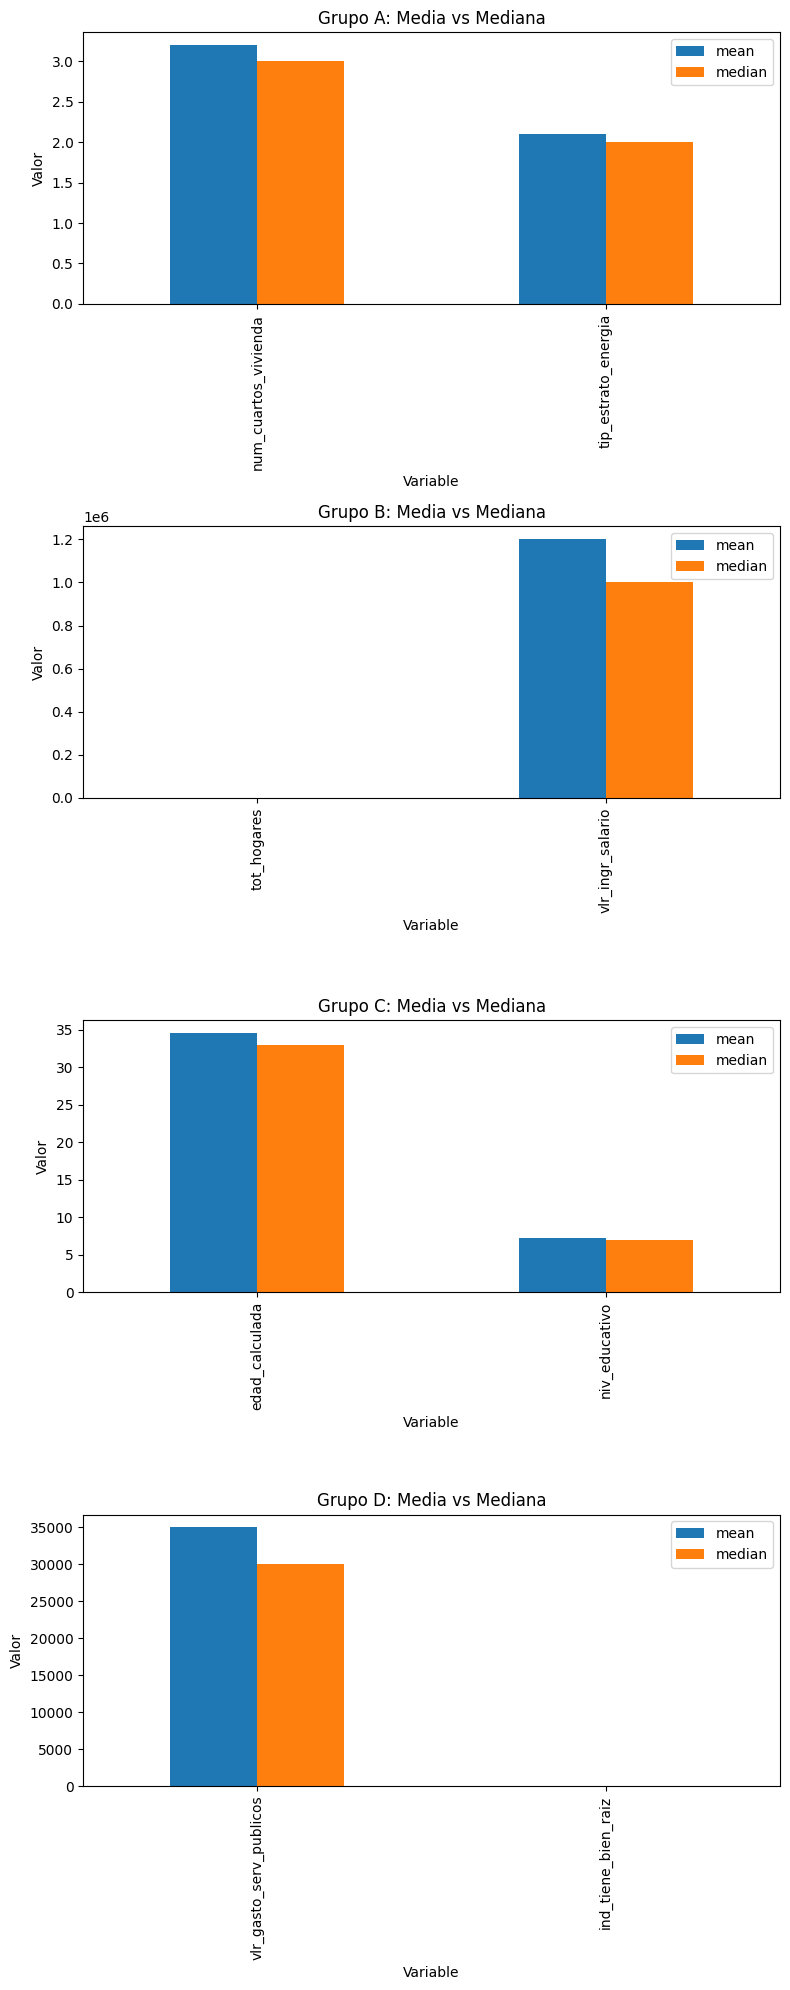

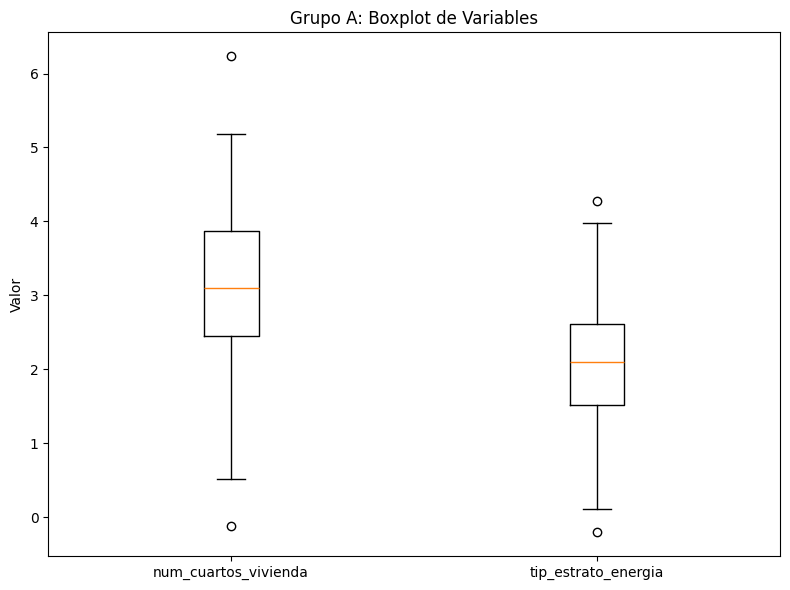

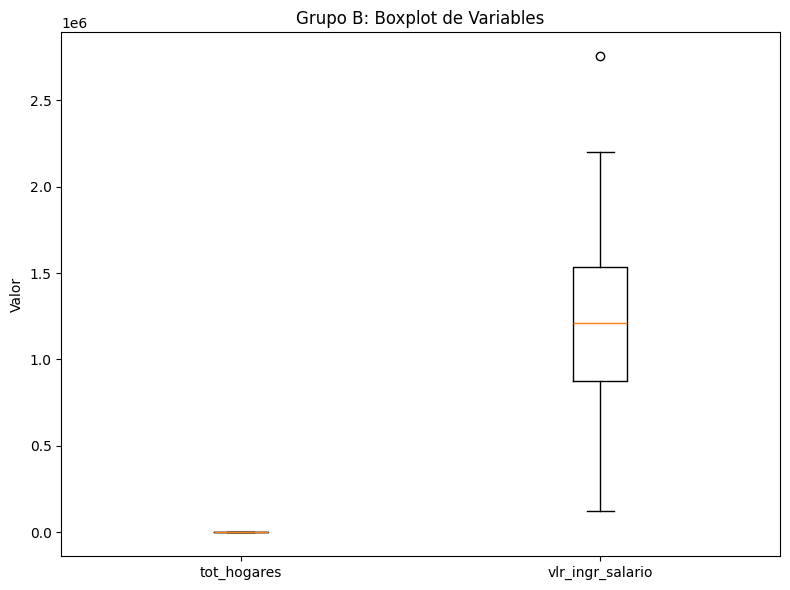

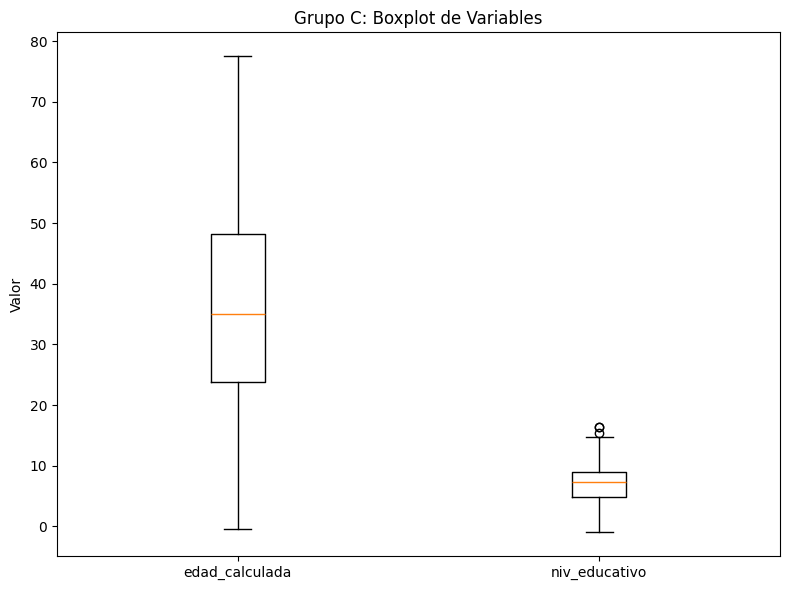

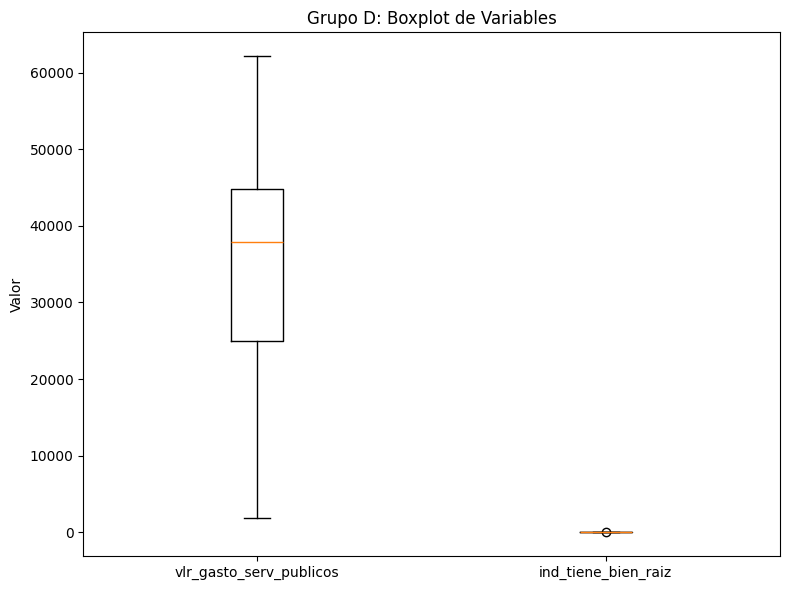

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulamos los DataFrames de estadísticos para cada grupo (A, B, C, D)
resultado_A = pd.DataFrame({
    'count': [100, 100],
    'mean': [3.2, 2.1],
    'median': [3, 2],
    'std': [1.1, 0.9],
    'min': [1, 1],
    'max': [6, 4]
}, index=['num_cuartos_vivienda', 'tip_estrato_energia'])

resultado_B = pd.DataFrame({
    'count': [95,  95],
    'mean': [4.5, 1200000],
    'median': [4,  1000000],
    'std': [1.0,  500000],
    'min': [1,  0],
    'max': [10, 3000000]
}, index=['tot_hogares', 'vlr_ingr_salario'])

resultado_C = pd.DataFrame({
    'count': [500, 480],
    'mean': [34.5, 7.2],
    'median': [33,  7],
    'std': [18.2, 3.1],
    'min': [0,  0],
    'max': [98,  20]
}, index=['edad_calculada', 'niv_educativo'])

resultado_D = pd.DataFrame({
    'count': [102, 102],
    'mean': [35000, 1.8],
    'median': [30000, 2],
    'std': [15000, 1.0],
    'min': [0,  0],
    'max': [120000, 3]
}, index=['vlr_gasto_serv_publicos', 'ind_tiene_bien_raiz'])

# Gráficos de barras: Media vs Mediana por grupo
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
grupos = ['A', 'B', 'C', 'D']
resultados_plot = [resultado_A, resultado_B, resultado_C, resultado_D]

for ax, grupo, df_res in zip(axes, grupos, resultados_plot):
    df_plot = df_res[['mean', 'median']]
    df_plot.plot(kind='bar', ax=ax, title=f'Grupo {grupo}: Media vs Mediana', legend=True)
    ax.set_ylabel('Valor')
    ax.set_xlabel('Variable')

plt.tight_layout()
plt.show()

# Boxplots por grupo: creamos datos simulados representativos
for i, grupo in enumerate(grupos):
    if grupo == 'A':
        data_vars = {
            'num_cuartos_vivienda': np.random.normal(loc=3.2, scale=1.1, size=100),
            'tip_estrato_energia': np.random.normal(loc=2.1, scale=0.9, size=100)
        }
    elif grupo == 'B':
        data_vars = {
            'tot_hogares': np.random.normal(loc=4.5, scale=1.0, size=100),
            'vlr_ingr_salario': np.random.normal(loc=1200000, scale=500000, size=100)
        }
    elif grupo == 'C':
        data_vars = {
            'edad_calculada': np.random.normal(loc=34.5, scale=18.2, size=100),
            'niv_educativo': np.random.normal(loc=7.2, scale=3.1, size=100)
        }
    else:  # Grupo D
        data_vars = {
            'vlr_gasto_serv_publicos': np.random.normal(loc=35000, scale=15000, size=100),
            'ind_tiene_bien_raiz': np.random.normal(loc=1.8, scale=1.0, size=100)
        }

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot([data_vars[col] for col in data_vars], labels=list(data_vars.keys()))
    ax.set_title(f'Grupo {grupo}: Boxplot de Variables')
    ax.set_ylabel('Valor')
    plt.tight_layout()
    plt.show()


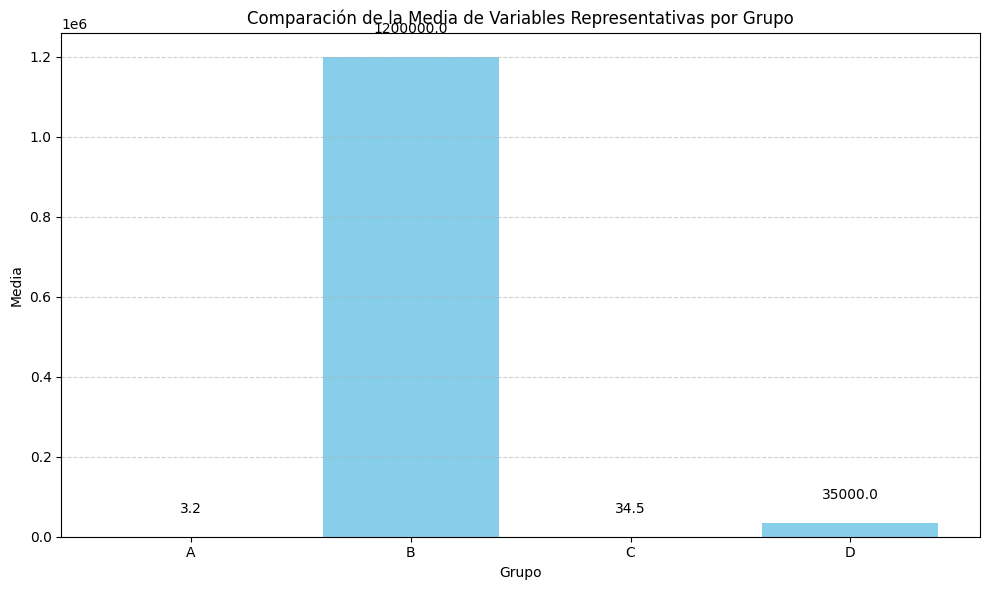

In [ ]:
# Seleccionamos los valores que queremos comparar
variables = ['num_cuartos_vivienda', 'vlr_ingr_salario', 'edad_calculada', 'vlr_gasto_serv_publicos']
medias = [
    resultado_A.loc['num_cuartos_vivienda', 'mean'],
    resultado_B.loc['vlr_ingr_salario', 'mean'],
    resultado_C.loc['edad_calculada', 'mean'],
    resultado_D.loc['vlr_gasto_serv_publicos', 'mean']
]

# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grupos, medias, color='skyblue')
plt.title('Comparación de la Media de Variables Representativas por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Media')
plt.xticks(ticks=range(len(grupos)), labels=grupos)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir valores encima de las barras
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.05 * max(medias), f'{valor:.1f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Cálculo de % del ingreso destinado a servicios públicos (Grupo D / Grupo B)
ingreso_medio = resultado_B.loc['vlr_ingr_salario', 'mean']
gasto_medio = resultado_D.loc['vlr_gasto_serv_publicos', 'mean']
porcentaje_gasto_ingreso = (gasto_medio / ingreso_medio) * 100

print(f'Porcentaje del ingreso destinado a servicios públicos: {porcentaje_gasto_ingreso:.2f}%')

# Coeficiente de variación del ingreso (variabilidad relativa)
cv_ingreso = resultado_B.loc['vlr_ingr_salario', 'std'] / ingreso_medio
print(f'Coeficiente de variación del ingreso: {cv_ingreso:.2f}')

# Diferencia entre nivel educativo y estrato
nivel_educativo_medio = resultado_C.loc['niv_educativo', 'mean']
estrato_medio = resultado_A.loc['tip_estrato_energia', 'mean']
print(f'Nivel educativo promedio: {nivel_educativo_medio:.2f}')
print(f'Estrato promedio de energía: {estrato_medio:.2f}')

# Índice Sintético de la Calidad Educativa (ISCE)
# 10 representa la mejor calidad y 1 la peor

Porcentaje del ingreso destinado a servicios públicos: 2.92%
Coeficiente de variación del ingreso: 0.42
Nivel educativo promedio: 7.20
Estrato promedio de energía: 2.10


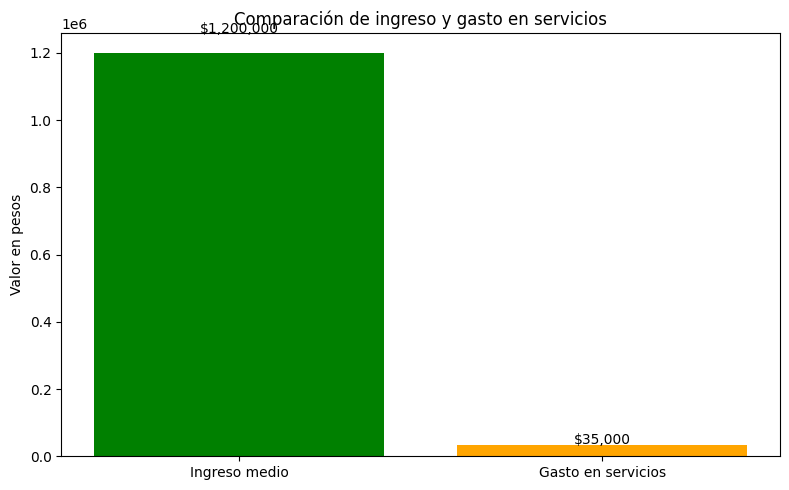

In [ ]:
# Gráfico de barras para comparar ingreso vs gasto
plt.figure(figsize=(8, 5))
plt.bar(['Ingreso medio', 'Gasto en servicios'], [ingreso_medio, gasto_medio], color=['green', 'orange'])
plt.title('Comparación de ingreso y gasto en servicios')
plt.ylabel('Valor en pesos')
for i, val in enumerate([ingreso_medio, gasto_medio]):
    plt.text(i, val + 0.05 * val, f"${val:,.0f}", ha='center')
plt.tight_layout()
plt.show()

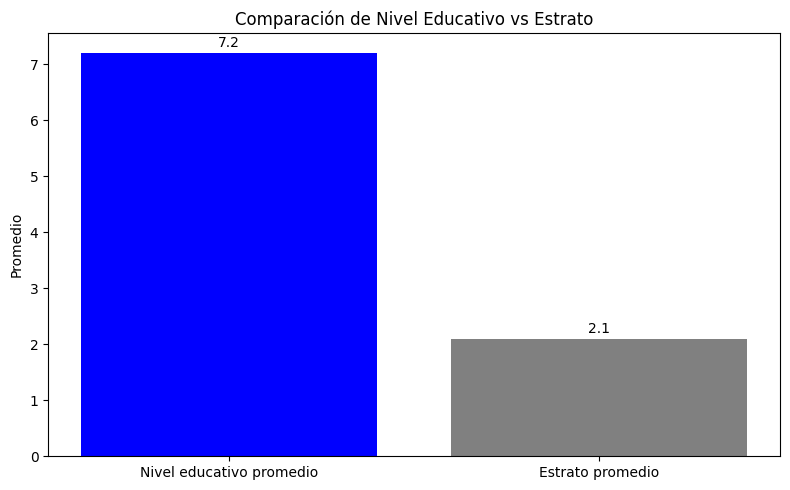

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Nivel educativo promedio', 'Estrato promedio'], [nivel_educativo_medio, estrato_medio], color=['blue', 'gray'])
plt.title('Comparación de Nivel Educativo vs Estrato')
plt.ylabel('Promedio')
for i, val in enumerate([nivel_educativo_medio, estrato_medio]):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center')
plt.tight_layout()
plt.show()

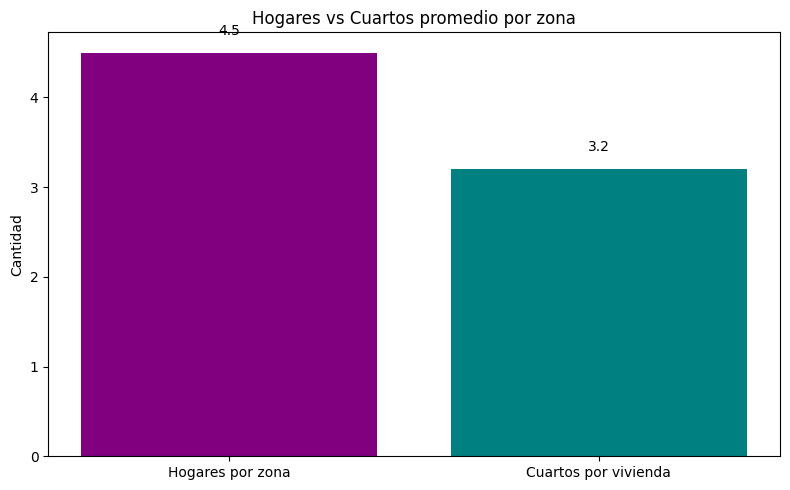

In [ ]:
cuartos = resultado_A.loc['num_cuartos_vivienda', 'mean']
hogares = resultado_B.loc['tot_hogares', 'mean']

plt.figure(figsize=(8, 5))
plt.bar(['Hogares por zona', 'Cuartos por vivienda'], [hogares, cuartos], color=['purple', 'teal'])
plt.title('Hogares vs Cuartos promedio por zona')
plt.ylabel('Cantidad')
for i, val in enumerate([hogares, cuartos]):
    plt.text(i, val + 0.2, f"{val:.1f}", ha='center')
plt.tight_layout()
plt.show()

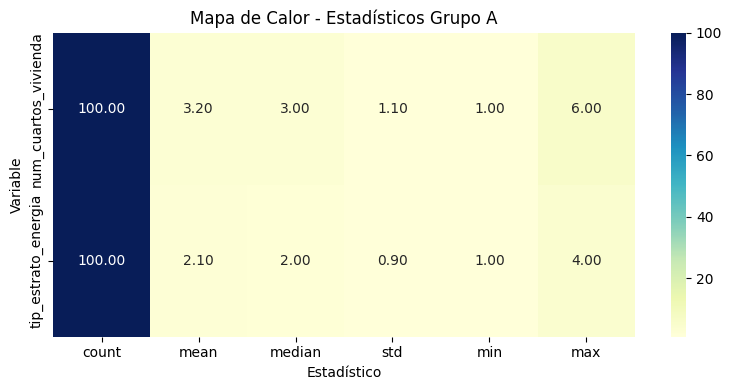

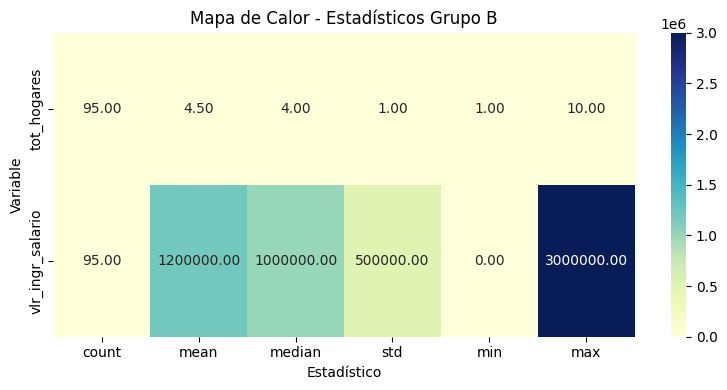

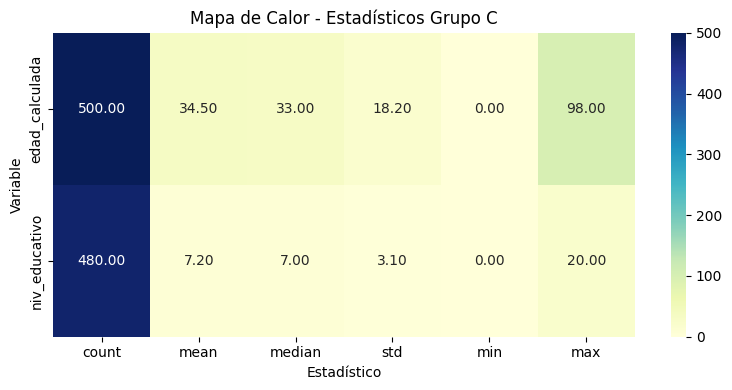

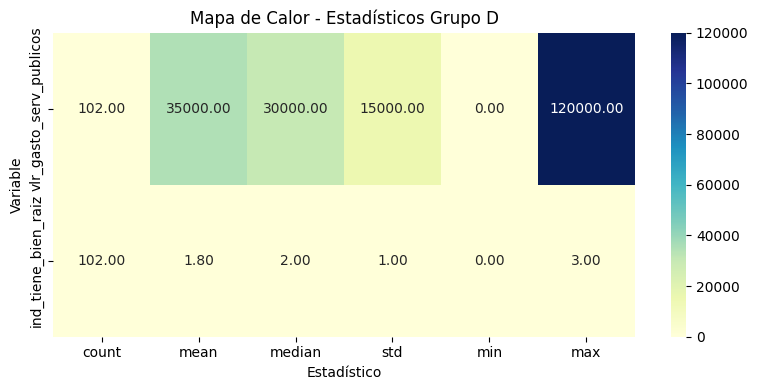

In [ ]:
# Lista de grupos y sus resultados
grupos = ['A', 'B', 'C', 'D']
resultados = [resultado_A, resultado_B, resultado_C, resultado_D]

# Creamos un mapa de calor para cada grupo
for grupo, df in zip(grupos, resultados):
    plt.figure(figsize=(8, 4))
    sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Mapa de Calor - Estadísticos Grupo {grupo}')
    plt.ylabel('Variable')
    plt.xlabel('Estadístico')
    plt.tight_layout()
    plt.show()

In [ ]:
# Índice de vulnerabilidad
indice_vulnerabilidad = (gasto_medio / ingreso_medio) + (10 - nivel_educativo_medio)/10 + (6 - estrato_medio)/6
print(f'Índice de vulnerabilidad estimado: {indice_vulnerabilidad:.2f}')

# El grupo tiene una vulnerabilidad media, lo que indica que está expuesto a ciertas condiciones de riesgo socioeconómico, aunque no en los niveles más críticos.
#Probablemente:

# Tiene un estrato bajo,

# Gasta poco en servicios (lo cual puede ser bueno o una señal de no acceso),

# Pero tiene un nivel educativo aceptable, lo que puede amortiguar el riesgo.


Índice de vulnerabilidad estimado: 0.96
